# Practical work 1: introduction and image enhancement 

- Quick start for Python (10 minutes!) : https://www.stavros.io/tutorials/python/
- Quick start for Numpy : https://numpy.org/devdocs/user/quickstart.html#
- For Matlab users: Numpy is very similar but with some important difference, see http://mathesaurus.sourceforge.net/matlab-numpy.html.
- Keep in mind that in Python, exception of variable of scalar type, all is reference and affectation is not a copy. 


## Short introduction to image processing with Python

Help: use the function `help()` to get information on a Python objet. 

Images are stored as arrays that is the default type of the `numpy` module. Defaut type of array elements is `float64` according to the IEEE754 norm. Special float values are defined: infinity (`inf`) and undefined (`nan`, *not a number*), and some numerical constants, such as $\pi$.
 


In [1]:
# import numpy
import numpy as np

# predefined constants
print(np.inf,np.nan,np.pi)

# some values
print( 1., 1e10, -1.2e-3)


inf nan 3.141592653589793
1.0 10000000000.0 -0.0012


### Creating an array: several ways.

1. From a list of values (formally any Python iterable object). Elements of an array have the same **type**, determined by Numpy:

In [2]:
V = np.array([1,2,3])
M = np.array([[1,2,3],[4,5,6.]])
print ("V is of type",V.dtype)
print ("M is of type",M.dtype)

V is of type int64
M is of type float64


2. Without values: Numpy has constructors such as `empty()`, `zeros()`, `ones()`... Shape should be given (see below). Important: `empty()` does not initialize array elements.

In [3]:
I = np.zeros((3,4))
print(I)
J = np.empty((4,3))
print(J)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


3. From a sequence, prefer `arange()` from numpy to `range()` from python.

In [4]:
print(np.arange(10))
print(np.arange(0,10,2))
print(np.arange(9,-1,-.5))

[0 1 2 3 4 5 6 7 8 9]
[0 2 4 6 8]
[ 9.   8.5  8.   7.5  7.   6.5  6.   5.5  5.   4.5  4.   3.5  3.   2.5
  2.   1.5  1.   0.5  0.  -0.5]


### Shape of an array

Shape decribes the number of elements for each dimension. A vector is of dimension 1, a matrix is of dimension 2. Superior dimensions are possible. Shape is not size that is the number of elements of an array. Type of shape is always a tuple of integers. With previous example: 

In [5]:
print(I.shape, I.size)
print(J.shape, J.size)
print(V.shape, V.size)

(3, 4) 12
(4, 3) 12
(3,) 3


An important function/method is `reshape()` to change the shape of an array. Typical usage of `reshape()` is to transform a vector into a matrix or reciprocally. 

In [6]:
K = np.arange(12).reshape((3,4))
print(K)
print(np.reshape(K,(12)))
print(K.reshape((2,2,3)))

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
[ 0  1  2  3  4  5  6  7  8  9 10 11]
[[[ 0  1  2]
  [ 3  4  5]]

 [[ 6  7  8]
  [ 9 10 11]]]


### Elements of an array

Access element by indices: two syntaxe are possible, the first given in the example is prefered. Negative index is possible with the same meanning of Python list.

In [7]:
I = np.arange(12).reshape((3,4))
print(I[1,2])
print(I[0][0])
print(I[-1,0])

6
0
8


Access by group of indices using the operator `:` allows to extract subarray. General syntaxe is `start:end:step` and it is very powerfull:

In [8]:
print('extract the first line')
print(I[0,:])
print(I[0,0:])
print(I[0,::])
print(I[0,::1])

print('extract center of the array')
print(I[1:3,1:3])

print('extract elements with even indices')
print(I[::2,::2])

print('print the horizontal mirror of an array')
print(I[:,::-1])
print(I)


extract the first line
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
[0 1 2 3]
extract center of the array
[[ 5  6]
 [ 9 10]]
extract elements with even indices
[[ 0  2]
 [ 8 10]]
print the horizontal mirror of an array
[[ 3  2  1  0]
 [ 7  6  5  4]
 [11 10  9  8]]
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


### Array arithmetic

Operators and functions can be applied to arrays. Mostly, operations are element-wise (i.e. applied element by element). The consequence is arrays should have the same shape. One operand can also be scalar in most of time.

In [9]:
A = np.arange(12).reshape((3,4))
B = 2 * A + 1
C = A + B
D = np.cos(2*np.pi*A/12)

print (D)
print (D**2)
print (D>0)

[[ 1.00000000e+00  8.66025404e-01  5.00000000e-01  6.12323400e-17]
 [-5.00000000e-01 -8.66025404e-01 -1.00000000e+00 -8.66025404e-01]
 [-5.00000000e-01 -1.83697020e-16  5.00000000e-01  8.66025404e-01]]
[[1.00000000e+00 7.50000000e-01 2.50000000e-01 3.74939946e-33]
 [2.50000000e-01 7.50000000e-01 1.00000000e+00 7.50000000e-01]
 [2.50000000e-01 3.37445951e-32 2.50000000e-01 7.50000000e-01]]
[[ True  True  True  True]
 [False False False False]
 [False False  True  True]]


Array may be viewed as matrix, we can make some linear algebraic manipulation. For example, `np.matmul()` is the matrix multiplication. It can be used to build matrix from vector. An example, using the transpose operator `T`. 

In [10]:
L = np.arange(1,6).reshape((1,5))
# transpose of L. Warning: C remains a reference to L
C = L.T
# This could be better if your want to touch L 
C = L.T.copy()

print("A 5*5 matrix:")
print(np.matmul(C,L))

print("A dot product, but result is a matrix:")
print(np.matmul(L,C))
print(np.matmul(L,C)[0,0])

print("dot() is prefered with vectors:")
V = np.arange(1,6)
print(V.dot(V))
print(np.dot(V,V))

A 5*5 matrix:
[[ 1  2  3  4  5]
 [ 2  4  6  8 10]
 [ 3  6  9 12 15]
 [ 4  8 12 16 20]
 [ 5 10 15 20 25]]
A dot product, but result is a matrix:
[[55]]
55
dot() is prefered with vectors:
55
55


### Images

We make use of PIL module (https://pillow.readthedocs.io/en/stable/reference/Image.html) to load and write an image and easily converted to Numpy array. Be careful: array type depends on image.

In [11]:
from PIL import Image

# reading an image and convert to array
myimage = np.array(Image.open('image.jpg'))

# write an image (alternative format) from an array
Image.fromarray(myimage).save('image.png')

Array can be displayed as an image using Matplotlib module. Here a short example:

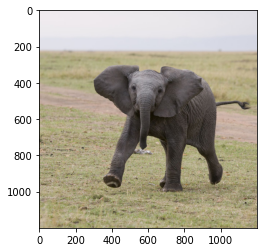

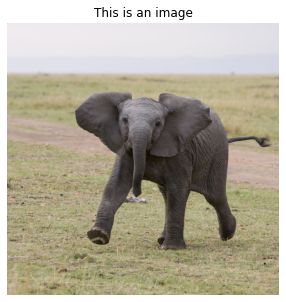

In [12]:
import matplotlib.pyplot as plt

# minimal example:
myimage[0,0] = (7,4,3)
plt.imshow(myimage)
plt.show()

# with more controls:
w,h=400,400
plt.figure(figsize=(w/80,h/80))  # optional, to control the size of figure (unit: pixel)
plt.gray() # optional call to display image using a gray colormap
plt.title('This is an image') # optional: add a title
plt.axis('off') # optional: remove axes
plt.imshow(myimage)
plt.show()


See also:
- https://matplotlib.org/3.1.1/tutorials/introductory/images.html
- https://matplotlib.org/gallery/images_contours_and_fields/image_demo.html#sphx-glr-gallery-images-contours-and-fields-image-demo-py). 

## Exercice 1
In this exercice, we work with image `img/moon.png`. If possible give two solutions : one with loops (for, while, ...) and one without loops. 

1. Write and test a function `openImage()` getting an image filename as argument and returning the array of pixel values.

In [13]:
from PIL import Image
import numpy as np

def openImage(fname):
    """ str -> Array 
    (notation above means the function gets a string argument and returns an Array object)
    """
    return np.array(Image.open(fname))


moon = openImage("img/moon.png")
moon

array([[ 1,  3,  7, ...,  8, 16,  8],
       [ 3,  7,  3, ...,  4, 11, 12],
       [ 6,  4,  6, ...,  7,  2,  3],
       ...,
       [ 4,  8,  8, ...,  6,  4,  8],
       [ 4,  8,  8, ...,  4,  6,  6],
       [ 2,  3,  3, ...,  6,  9,  9]], dtype=uint8)

2. Write and test a function `countPixels()` getting an array and an integer `k` as arguments and returning the number of pixels having the value `k`.

In [14]:
def countPixels(I,k):
    """ Array*int -> int"""
    cpt = 0
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            if I[i,j] == k:
                cpt += 1 
    
    return cpt

def countPixelsWithoutLoops(I, k):
    return np.count_nonzero(I == k)

countPixelsWithoutLoops(moon, 32)

137

3. Write and test a function `replacePixels()` getting an array and two intergers and replacing pixels having `k1`value to `k2` value and returning the new array. Be aware to not modify `I`.

In [15]:
def replacePixels(I,k1,k2):
    """ Array*int*int -> Array """
    nI = I.copy()
    
    for i in range(nI.shape[0]):
        for j in range(nI.shape[1]):
            if nI[i,j] == k1:
                nI[i,j] = k2
    return nI

def replacePixelsWithoutLoops(I,k1,k2):
    return np.where(I==k1,k2,I)

replacePixelsWithoutLoops(moon, 7,133)

array([[  1,   3, 133, ...,   8,  16,   8],
       [  3, 133,   3, ...,   4,  11,  12],
       [  6,   4,   6, ..., 133,   2,   3],
       ...,
       [  4,   8,   8, ...,   6,   4,   8],
       [  4,   8,   8, ...,   4,   6,   6],
       [  2,   3,   3, ...,   6,   9,   9]], dtype=uint8)

4. Write and test a function `normalizeImage()` getting an array and two integers `k1` and `k2` and returning an array with elements normalized to the interval $[k_1,k_2]$. 

In [16]:
def normalizeImage(I,k1,k2):
    """ Array*int*int -> Array """
    nI = I.copy()
    kmin = np.min(nI)
    kmax = np.max(nI)
    for i in range(nI.shape[0]):
        for j in range(nI.shape[1]):
            nI[i,j] = (((nI[i,j] - kmin)/(kmax-kmin))*(k2-k1))+k1
    return nI

def normalizeImageWithoutLoops(I, k1, k2):
    nI = I.copy()
    kmin = np.min(nI)
    kmax = np.max(nI)
    return np.floor((((nI-kmin)/(kmax-kmin))*(k2-k1))+k1).astype(int)

normalizeImageWithoutLoops(moon, 3, 50)

array([[3, 3, 4, ..., 4, 5, 4],
       [3, 4, 3, ..., 3, 5, 5],
       [4, 3, 4, ..., 4, 3, 3],
       ...,
       [3, 4, 4, ..., 4, 3, 4],
       [3, 4, 4, ..., 3, 4, 4],
       [3, 3, 3, ..., 4, 4, 4]])

5. Write and test a function `inverteImage()` getting an array and returning and array having inverted pixel values (i.e. the transform $k \mapsto 255-k$

In [17]:
def inverteImage(I):
    """ Array -> Array """
    nI = I.copy()
    for i in range(nI.shape[0]):
        for j in range(nI.shape[1]):
            nI[i,j] = 255-nI[i,j]
    return nI

def inverteImageWithoutLoops(I):
    nI = I.copy()
    return 255-nI

inverteImageWithoutLoops(moon)

array([[254, 252, 248, ..., 247, 239, 247],
       [252, 248, 252, ..., 251, 244, 243],
       [249, 251, 249, ..., 248, 253, 252],
       ...,
       [251, 247, 247, ..., 249, 251, 247],
       [251, 247, 247, ..., 251, 249, 249],
       [253, 252, 252, ..., 249, 246, 246]], dtype=uint8)

6. Write and test a function `computeHistogram()` getting an array and returning its histogram. Type of histogram can be an array or a list. It is forbidden to use an histogram method from a Python module. Is it possible to compute the histogram without explicitely visiting array pixels? 

In [18]:
def computeHistogram(I):
    """ Array -> list[int] """
    hist = np.zeros(256).astype(int)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            hist[I[i,j]] += 1
    return hist

computeHistogram(moon)
# use comments to answer to a verbal question
# not that I know :/

array([ 1459, 20126, 30924, 25408, 17167, 11368,  7369,  4767,  3213,
        2178,  1486,   993,   632,   488,   371,   301,   255,   217,
         201,   202,   190,   165,   168,   140,   160,   157,   129,
         136,   140,   135,   137,   121,   137,   114,   127,   129,
         115,   132,   123,   124,   101,    91,   122,   116,   129,
         109,   108,   116,   113,   123,   109,   140,   101,   109,
         114,   117,   140,   127,   140,   142,   129,   134,   192,
         160,   179,   165,   170,   154,   155,   159,   164,   184,
         166,   180,   169,   132,   153,   171,   165,   156,   166,
         142,   151,   179,   159,   154,   167,   166,   179,   163,
         195,   198,   181,   216,   230,   231,   250,   256,   264,
         291,   245,   242,   279,   247,   261,   304,   287,   286,
         296,   286,   292,   296,   285,   312,   274,   312,   282,
         308,   296,   267,   273,   304,   327,   263,   286,   282,
         272,   246,

7. Write and test a function `thresholdImage()` getting an array `I` and an integer `s` and returning an array having elements set to 0 if corresponding element of `I` is lower than `s` or 255 otherwise.

In [19]:
def thresholdImage(I,s):
    """ Array*int -> Array """
    nI = I.copy()
    for i in range(nI.shape[0]):
        for j in range(nI.shape[1]):
            if nI[i,j] <= s:
                nI[i,j] = 0
            else:
                nI[i,j] = 255
    return nI

def thresholdImageWithoutLoops(I,s):
    nI = I.copy()
    return np.where(nI <= s, 0, 255)

thresholdImageWithoutLoops(moon, 127)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

8. Using previous functions, give a series of instructions to read then to display an image, plot the histogram (one can use `plot()` or `bar()` from `matplotlib.pyplot` module), inverse the image and display it, plot its histogram.

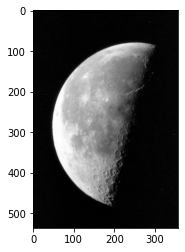

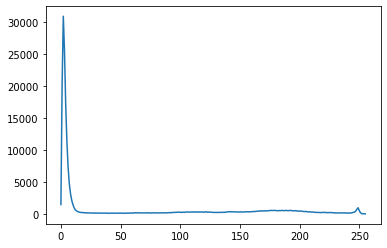

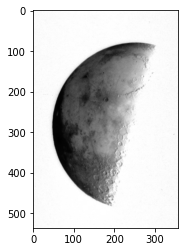

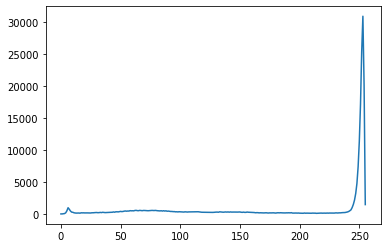

In [20]:
import matplotlib.pyplot as plt

## your code start below
moon = openImage("img/moon.png")
hist = computeHistogram(moon)

moonInvert = inverteImageWithoutLoops(moon)
histInvert = computeHistogram(moonInvert)

plt.imshow(moon)
plt.show()

plt.plot(hist)
plt.show()

plt.imshow(moonInvert)
plt.show()

plt.plot(histInvert)
plt.show()

9. Give a series of instructions to read and display an image, plot the histogram, normalize the image to the interval $[10,50]$, compute the new histogram, display the image and the histogram. Remark: `imshow()` normalizes image. To avoid this and see the effect of the normalization, use `imshow()` with parameters `vmin=0,vmax=255`. Comment the results.

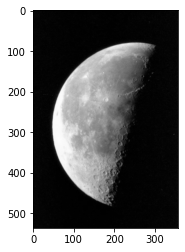

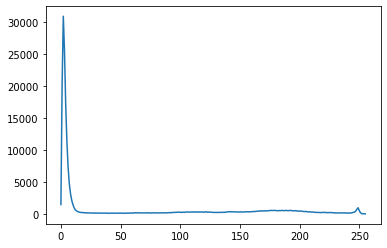

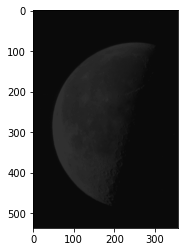

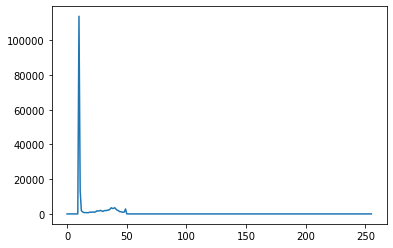

In [21]:
moon = openImage("img/moon.png")
mHist = computeHistogram(moon)
moonNormalized = normalizeImageWithoutLoops(moon, 10, 50)
mHistNormalized = computeHistogram(moonNormalized)


plt.imshow(moon, vmin=0, vmax=255)
plt.show()

plt.plot(mHist)
plt.show()

plt.imshow(moonNormalized, vmin=0, vmax=255)
plt.show()

plt.plot(mHistNormalized)
plt.show()

# L'image a plus de nuances avant la normalisation.

10. Same question than 9. remplacing the normalization by a thresholding with parameter $s=127$.

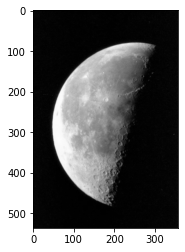

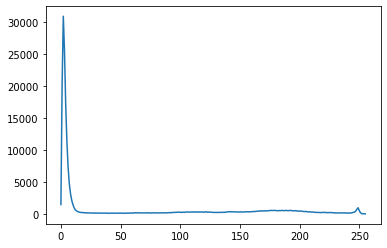

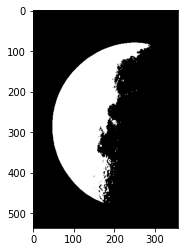

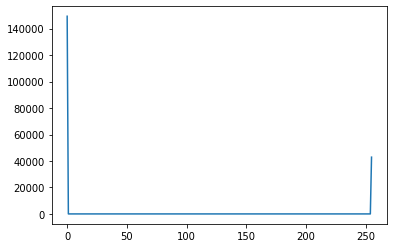

In [22]:
moon = openImage("img/moon.png")
mHist = computeHistogram(moon)
moonThresholded = thresholdImageWithoutLoops(moon, 127)
mHistThresholded = computeHistogram(moonThresholded)


plt.imshow(moon, vmin=0, vmax=255)
plt.show()

plt.plot(mHist)
plt.show()

plt.imshow(moonThresholded, vmin=0, vmax=255)
plt.show()

plt.plot(mHistThresholded)
plt.show()

## Exercice 2 - generate images

1. Create the array `I` 4 by 4 corresponding to the following image: <div> 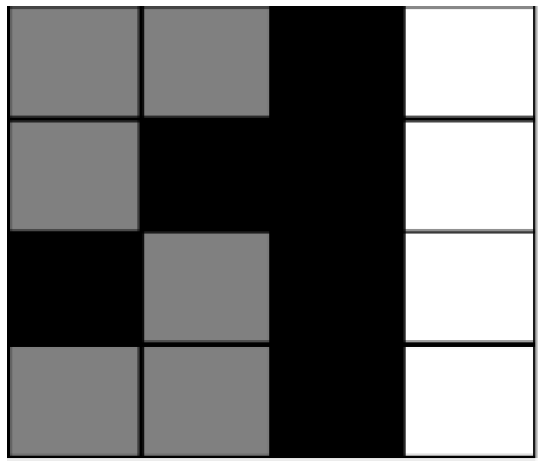 </div> Black pixels have value 0, white pixels value 255, and grey pixels value 127. Display the image using `imshow()` and plot the histogram.

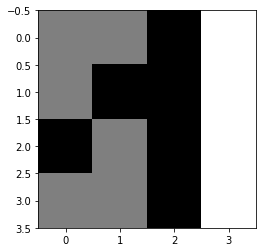

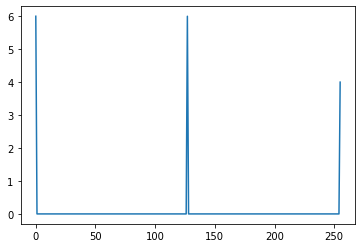

In [23]:
I = np.array([127, 127, 0, 255, 127, 0, 0, 255, 0, 127, 0, 255, 127, 127, 0, 255]).reshape((4,4))
histI = computeHistogram(I)

plt.imshow(I)
plt.show()

plt.plot(histI)
plt.show()

2. We want to generate a matrix having random values. Functions `rand()` and `randn()` from  `numpy.matlib` module generate array of given shape with random values following respectively a uniform distribution on $[0,1[$ and a normal distribution. Create an array of shape 512 by 512 having **integer** elements following an uniform distribution in the set $\{0,1,\cdots,255\}$ . We also want to create an array following a gaussian distribution with a mean of 128 and a standard deviation of 16 and with **integer** values.  Display the images and their histogramms. Discuss the results.

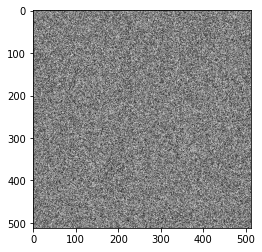

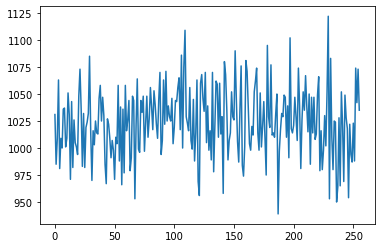

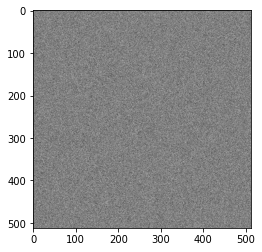

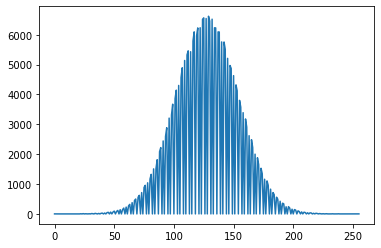

In [73]:
import numpy.matlib as nm

R = np.floor(nm.rand((512, 512))*256).astype(int)
histR = computeHistogram(R)

Rn = np.floor(np.random.normal(128, 16, (512,512))).astype(int)
Rn = normalizeImageWithoutLoops(Rn, 0, 255) # on a pas le droit d'utiliser ca
histRn = computeHistogram(Rn)

plt.imshow(R)
plt.show()

plt.plot(histR)
plt.show()

plt.imshow(Rn)
plt.show()

plt.plot(histRn)
plt.show()

## Exercice 3: image manipulation
In this exercice, we work with image `img/pout.png`. 

1. Read and display this image

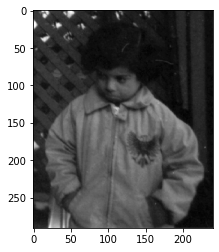

In [25]:
pout = openImage("img/pout.png")
plt.imshow(pout)
plt.show()

2. Examine the histogram. Determine the extrema of the image. What can you say about the quality of this image?

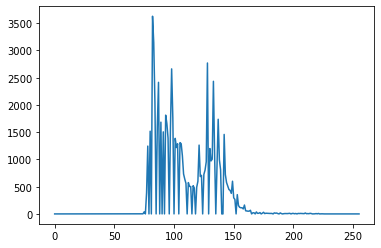

74 224


In [26]:
hist = computeHistogram(pout)
plt.plot(hist)
plt.show()

valMin = np.min(pout)
valMax = np.max(pout)

print(valMin, valMax)

# Il y a peu de nuances de couleurs sur l'image étudiée... :/
# Les valeurs min et max sont relativement éloignées mais grâce à l'histograme 
# on remarque que la plupart des valeurs sont entre 74 et 160

3. Using functions from Exercice 1, write the function `histogramEqualization()` getting one image, its histogram,  applying an histogram equalization and returning the new image. Test this function on `pout.png` and discuss the result.

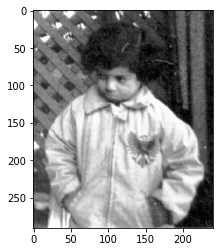

In [27]:
def histogramEqualization(I,h):
    """ Array * (list[int] -> Array """
    hc = np.zeros(h.size).astype(int)
    kmax = np.max(I)
    kmin = np.min(I)
    
    cumul = 0
    for i in range(h.size):
        cumul += h[i]
        hc[i] = cumul
        
    he = np.floor(((kmax-kmin)/(I.shape[0]*I.shape[1]))*hc).astype(int)

    for i in range(nI.shape[0]):
        for j in range(nI.shape[1]):
            nI[i,j] = he[I[i,j]]
    
    return nI

def histogramEqualizationWithoutLoops(I,h):
    """ Array * (list[int] -> Array """
    kmax = np.max(I)
    kmin = np.min(I)
    
    hc = np.nancumsum(h)
    he = np.floor(((kmax-kmin)/(I.shape[0]*I.shape[1]))*hc).astype(int)
    
    nI = np.where(True, he[I], I)
    
    return nI
        
    
plt.imshow(histogramEqualizationWithoutLoops(pout, computeHistogram(pout)))
plt.show()

# Discuss the result